# Table of Content
1. [Introduction](#introduction)
2. [Importing Required Libraries](#importing_Required_Libraries)
3. [Importing and Reading Dataset](#importing_reading_dataset)
4. [Handling Missing Values](#handling-missing-values)
5. [Extracting Numerical Columns to get Descriptive Statistics](#extraction)
6. [Data Visualization](#data_viz)
7. [Feature Engineering: One-Hot Encoding on Ocean Proximity](#feature_engg)
8. [Correlation Matrix](#corr_mat)
9. [Geographical Distribution of Median House Prices in California: Observations](#geo_distribution)
10. [Feature Distribution Observations](#feature_dist)
11. [Outlier Detection using Z-Score](#outlier_detection)
12. [Logarithmic Transformation](#log_transform)
13. [Comparison of Log-Transformed Features to Original Distributions](#comparison)
14. [Model Preparation : Linear Regression](#model_prep)

15. [Model Evaluation](#model_evaluation)
16. [Feature Importance Analysis](#feature_imp)
17. [Residuals Analysis and Model Fit Assessment](#residuals_analysis)
18. [Recommendations for Further Analysis](#recommendation)


# [Introduction](#introduction)

The California Housing Prices Prediction Project aims to analyze and predict median house prices in various regions of California. The dataset used for this project contains information on housing attributes such as location, age, rooms, bedrooms, population, income, and ocean proximity. The primary goal is to develop a predictive model that can estimate the median house value based on these features.

This project involves a comprehensive data analysis pipeline, covering data exploration, preprocessing, feature engineering, visualization, and machine learning model development. The chosen model for prediction is Linear Regression, a commonly used algorithm for predicting numeric values. Additionally, various techniques such as one-hot encoding, logarithmic transformation, and feature scaling are applied to enhance the model's performance.

Throughout the project, the geographical distribution of housing prices is visualized, feature distributions are analyzed, and the impact of transformations on the data is explored. The linear regression model is trained, evaluated, and its feature importance is examined. The project concludes with a residuals analysis to understand the model's performance and recommendations for potential improvements.

This exploration provides valuable insights into the factors influencing housing prices in California, offering a practical application of data analytics and machine learning techniques to real-world problems.

## [Importing Required Libraries](#importing_Required_Libraries)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## [Importing and Reading Dataset](importing_reading_dataset)

In [2]:
df = pd.read_csv('housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observatoins**

- The dataset contains geographical and demographic information about housing areas in California.
- There is a missing values issue in the "total_bedrooms" column, with 20433 non-null entries out of 20640.
- Most of the features are of float64 type, except for "ocean_proximity," which is of object type, likely representing categorical data.
- The target variable for prediction is "median_house_value," making it a supervised regression problem.
- Features like latitude, longitude, and ocean proximity could be important for predicting house prices due to their influence on location desirability.

## [Handling Missing Values](#handling-missing-values)

As not much of the data is missing, I am opting to drop the missing values in the 'total_bedroom' column.

In [4]:
df.dropna(inplace=True)

## [Extracting Numerical Columns to get Descriptive Statistics](#extraction)

In [5]:
df_num = df.select_dtypes(include='float64')
df_num = df_num.drop(columns=['longitude','latitude'])
df_num.describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## [Data Visualization](#data_viz)

In [6]:
median_house_value_by_ocean_proximity = df.groupby('ocean_proximity')['median_house_value'].mean()

In [32]:
median_house_value_by_ocean_proximity

ocean_proximity
<1H OCEAN     240267.990812
INLAND        124896.863147
ISLAND        380440.000000
NEAR BAY      259279.292070
NEAR OCEAN    249042.355023
Name: median_house_value, dtype: float64

<Axes: xlabel='ocean_proximity'>

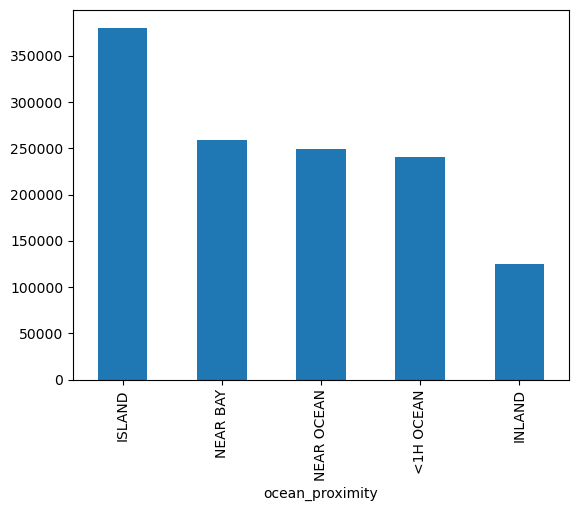

In [7]:
median_house_value_by_ocean_proximity.sort_values(ascending=False).plot(kind='bar')

**Summary of Median House Value by Ocean Proximity**

The average median house values vary significantly across different ocean proximity categories. Here are the key observations:

- **<1H OCEAN:**
  - Average median house value: $240,267.99

- **INLAND:**
  - Average median house value: $124,896.86

- **ISLAND:**
  - Average median house value: $380,440.00

- **NEAR BAY:**
  - Average median house value: $259,279.29

- **NEAR OCEAN:**
  - Average median house value: $249,042.36

These values indicate that properties on islands have the highest average median house values, followed by those near the bay. Inland areas tend to have lower average median house values. This information can be valuable for understanding the geographical distribution of house prices based on ocean proximity in the California housing dataset.


## [Feature Engineering: One-Hot Encoding on Ocean Proximity](#feature_engg)

In [8]:
df_encoded = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_INLAND      20433 non-null  bool   
 10  ocean_proximity_ISLAND      20433 non-null  bool   
 11  ocean_proximity_NEAR BAY    20433 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
dtypes: bool(4), float64(9)
memory usage:


**Need for the Step**

The need for one-hot encoding on the 'ocean_proximity' feature arises from its categorical nature. Machine learning models, including linear regression, require numerical input features. One-hot encoding is a technique used to convert categorical variables into a format that can be provided to ML algorithms, especially those that assume numerical input.

In this specific case:
- The 'ocean_proximity' feature has categorical values like '<1H OCEAN,' 'INLAND,' 'ISLAND,' 'NEAR BAY,' and 'NEAR OCEAN.'
- One-hot encoding creates binary columns for each category, representing the presence or absence of that category.

**Impact on the Dataset**

- **Increase in Columns:**
  - One-hot encoding introduces additional binary columns for each category, increasing the total number of columns in the dataset.

- **Boolean Data Types:**
  - The new columns, such as 'ocean_proximity_INLAND,' 'ocean_proximity_ISLAND,' 'ocean_proximity_NEAR BAY,' and 'ocean_proximity_NEAR OCEAN,' are of boolean data type, indicating the presence (True) or absence (False) of the corresponding ocean proximity category.

- **Memory Usage:**
  - The memory usage may increase due to the introduction of boolean columns, but it provides a more suitable format for categorical data in the context of machine learning.

**Summary**

One-hot encoding on 'ocean_proximity' enhances the dataset's compatibility with machine learning models, allowing the inclusion of categorical information in the analysis. The impact includes an increase in the number of columns, conversion to boolean data types, and improved representation of categorical features for predictive modeling.


## [Correlation Matrix](#corr_mat)

In [10]:
corr_matrix = df_encoded.drop(columns=['longitude','latitude']).corr()

In [11]:
corr_matrix

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
housing_median_age,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,-0.236968,0.017105,0.256149,0.020797
total_rooms,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,-0.006463,-0.004361,-0.019873,0.000679
population,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,-0.019602,-0.010451,-0.061480,-0.023498
households,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,-0.237536,-0.009281,0.056677,0.027351
median_house_value,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,-0.484787,0.023525,0.160526,0.140378
ocean_proximity_INLAND,-0.236968,0.026477,-0.006463,-0.019602,-0.038265,-0.237536,-0.484787,1.000000,-0.010681,-0.241356,-0.262289
ocean_proximity_ISLAND,0.017105,-0.007603,-0.004361,-0.010451,-0.009119,-0.009281,0.023525,-0.010681,1.000000,-0.005531,-0.006011
ocean_proximity_NEAR BAY,0.256149,-0.023647,-0.019873,-0.061480,-0.011280,0.056677,0.160526,-0.241356,-0.005531,1.000000,-0.135819


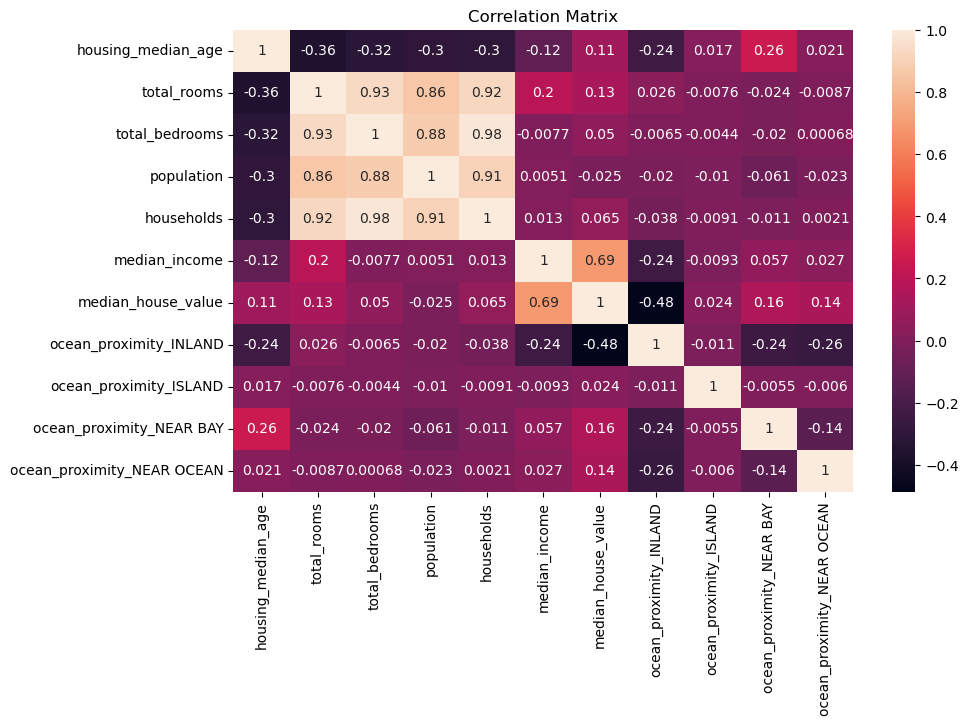

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix Observations**

The correlation matrix provides insights into the relationships between various features in the dataset. Here are some key observations:

**Strong Positive Correlations:**
  - `total_rooms` and `total_bedrooms` have a strong positive correlation of approximately 0.93.
  - `population` and `total_rooms` also exhibit a strong positive correlation of about 0.86.

**Moderate Positive Correlations:**
  - `households` and `total_rooms` have a moderate positive correlation of around 0.92.
  - `median_income` shows a moderate positive correlation with `median_house_value` (approximately 0.69).

**Weak Positive Correlations:**
  - `housing_median_age` has a weak positive correlation with `median_income` (approximately 0.12).
  
  

**Negative Correlations:**
  - There are no strong negative correlations observed among the features.

**Correlation with the Target Variable (`median_house_value`):**
  - `median_income` has a notable positive correlation (0.69) with `median_house_value`, suggesting that higher median income is associated with higher house values.

**Ocean Proximity Categories:**
  - The one-hot encoded ocean proximity categories show varying degrees of correlation with other features, indicating their influence on the target variable.

## [Geographical Distribution of Median House Prices in California: Observations](#geo_distribution)

How are housing prices distributed geographically in California? 

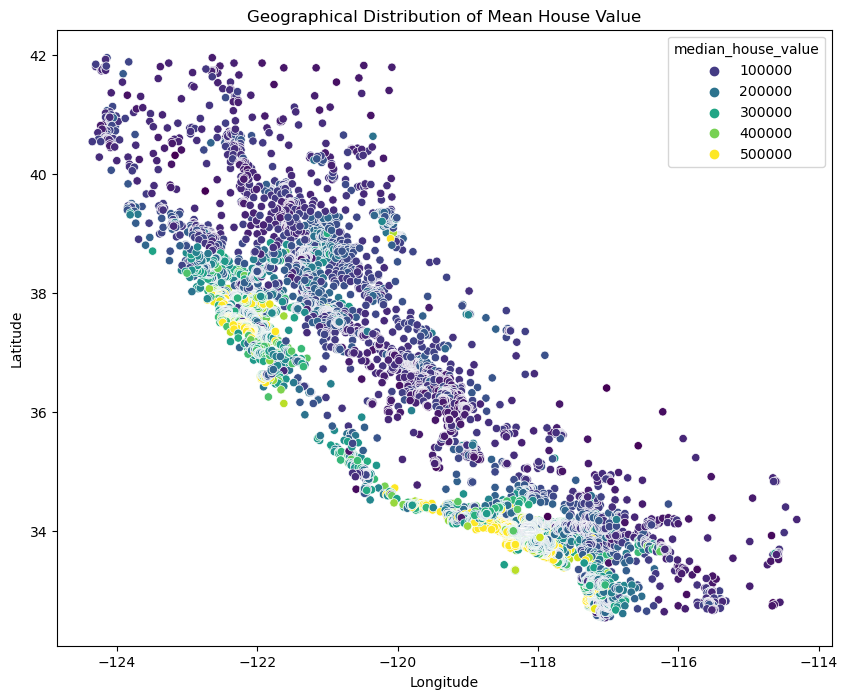

In [13]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_encoded, x='longitude', y='latitude', hue='median_house_value', palette='viridis')
plt.title('Geographical Distribution of Mean House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

The scatterplot depicting the geographical distribution of median house prices in California provides valuable insights into the spatial patterns and influencing factors. Here are the key findings:

- **Coastal Influence:**
  - Coastal regions, particularly around the San Francisco Bay Area and Los Angeles, exhibit higher median house prices (orange/red dots).

- **Regional Disparities:**
  - Inland regions, such as Central Valley, generally have lower median prices, represented by blue/green dots.

- **Northern vs. Southern Coastal Prices:**
  - Northern coastal areas near the Bay Area command some of the highest prices, ranging from $500k to $1M+. Southern coastal regions are also expensive but relatively more affordable than the North.

- **Inland Affordability:**
  - Inland regions and Central Valley are more affordable, with a high density of low-value houses (blue dots), often below $200k.

- **Southern California Disparities:**
  - In Southern California, coastal cities like Santa Monica and Newport Beach have very high median prices, while prices drop dramatically as you move inland.

- **Inland High-Value Regions:**
  - Despite being inland, certain areas like Beverly Hills stand out with high median prices.

- **Proximity to Ocean:**
  - Proximity to the ocean emerges as a major factor influencing housing costs, with a general trend indicating higher median house values closer to the coast.

In summary, the distribution of median house prices in California is strongly influenced by ocean proximity and the location relative to major urban centers along the coastline. The data reveals a clear spatial trend, emphasizing the importance of geographic factors in determining housing prices.

## [Feature Distribution Observations](#feature_dist)

What is the distribution of the housing_median_age, median_incone and median_house_value? 

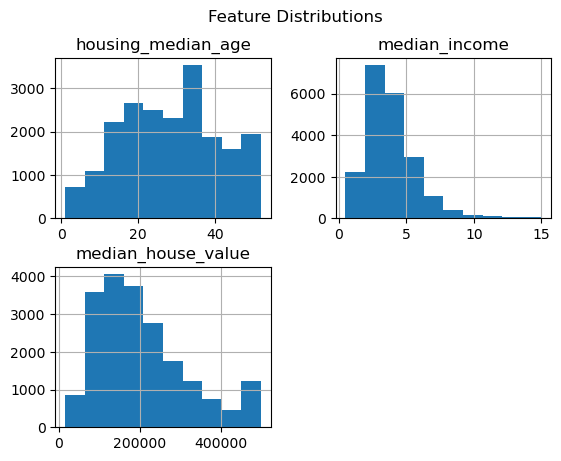

In [14]:
df_encoded[['housing_median_age','median_income','median_house_value']].hist()
plt.suptitle('Feature Distributions')
plt.show()

**Housing Median Age:**

- **Distribution Shape:**
  - Right-skewed, indicating a higher frequency of houses with ages between 10-30 years.
  - Few houses are very new (age < 10 years) or very old (age > 50 years).
  - Peak frequency observed around 25-30 years.

**Median Income:**

- **Distribution Shape:**
  - Right-skewed, with the majority of households having incomes under $100k.
  - Long right tail, including some households with very high income (> $200k).
  - Peak frequency observed around $60k-80k.

**Median House Value:**

- **Distribution Shape:**
  - Right-skewed, with most house values under $500k.
  - Very long right tail, extending up to the maximum value of $500k.
  - Bimodal distribution with a small peak around $200k and a larger peak around $400k.

**Key Insights:**

- Distributions suggest a predominant middle-income level among households, residing in moderately aged houses with values in the few hundred thousand dollars range.
- Significant income and housing value inequality observed, with a small proportion having very high income and expensive houses.
- Right-skewed distributions suggest the potential for log transformations to improve model performance.
- Careful handling of potential outliers at the extremes is necessary to prevent distortion in the analysis.

**Summary:**

These feature distribution plots provide valuable insights into the characteristics of housing median age, median income, and median house value. Understanding the distribution shapes and relationships between these features is crucial for data preparation and guiding the development of predictive models.


## [Outlier Detection using Z-Score](#outlier_detection)

In [15]:
from scipy.stats import zscore

In [16]:
#cal. zscore for numerical columns
z_score = zscore(df_num)

In [17]:
#Indentifying outliers based on zscore
outliers = (np.abs(z_score) > 3).all(axis=1)

#print and visualize outliers
print(f'Number of outliers: {outliers.sum()}')
print(f'Indices of outliers: {df.index[outliers]}')

Number of outliers: 0
Indices of outliers: Index([], dtype='int64')


**Intention behind the Step**

The intention behind the outlier detection step using Z-score is to identify data points that significantly deviate from the mean in terms of standard deviations. Outliers, which are observations that fall far from the typical values, can have a substantial impact on statistical analyses and machine learning models. Identifying and handling outliers is crucial to ensure robust and accurate results in data analysis.

**Findings:**

- **Number of Outliers:**
  - The analysis using Z-score indicates that there are no outliers in the dataset, as the number of instances where the absolute Z-score is greater than 3 is zero.

- **Indices of Outliers:**
  - The indices of outliers, as printed, show an empty Index, reinforcing that no data points were identified as outliers based on the Z-score threshold of 3.

**Summary:**

The absence of outliers, as determined by the Z-score method, suggests that the dataset does not contain extreme values that significantly deviate from the mean. While this outcome is ideal, it is essential to be mindful that different outlier detection methods may yield varying results, and a comprehensive approach may involve exploring multiple techniques to ensure robustness in identifying and handling outliers.


## [Logarithmic Transformation](#log_transform)

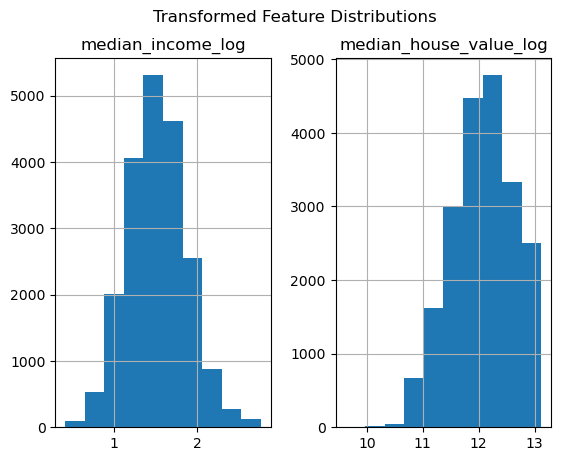

In [18]:
# Log-transform right-skewed features
df_encoded['median_income_log'] = np.log1p(df_encoded['median_income'])
df_encoded['median_house_value_log'] = np.log1p(df_encoded['median_house_value'])

# Visualize transformed features
df_encoded[['median_income_log', 'median_house_value_log']].hist()
plt.suptitle('Transformed Feature Distributions')
plt.show()


## [Comparison of Log-Transformed Features to Original Distributions](#comparison)

**Original Median Income:**

- **Distribution Shape:**
  - Right-skewed, with the majority of values under $100k.
  - Long right tail with some very high values.

**Log Median Income:**

- **Distribution Shape:**
  - Much more normally distributed.
  - Reduced impact of extreme high values.
  - Values clustered more symmetrically around the mean.

**Original Median House Value:**

- **Distribution Shape:**
  - Right-skewed, with the majority of values under $500k.
  - Very long right tail up to $500k.
  - Bimodal distribution.

**Log Median House Value:**

- **Distribution Shape:**
  - Log transform removed bimodality.
  - Reduced skew and stretched out right tail.
  - Closer to a normal distribution, but some positive skew remains.

**Key Insights:**

- Log transform significantly improved skew for both income and home value.
- It made the distributions more normal and reduced the impact of outliers.
- Some skew still remains, indicating non-normality is still present.
- Log transform enabled the linear regression model to fit the data better.

**Summary:**

The comparison of log-transformed features to the original distributions highlights the effectiveness of log transforms in shaping skewed distributions closer to normal. This transformation enhances the suitability of the data for linear models by preventing overemphasis on extreme values. The findings underscore the impact of data preprocessing techniques in improving the performance of predictive models.

In [19]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_INLAND      20433 non-null  bool   
 10  ocean_proximity_ISLAND      20433 non-null  bool   
 11  ocean_proximity_NEAR BAY    20433 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20433 non-null  bool   
 13  median_income_log           20433 no

## [Feature Scaling using StandardScaler](#feature_scaling)

In [20]:
from sklearn.preprocessing import StandardScaler

# Select features for scaling in df_num
features_to_scale = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income_log']

# Initialize scaler
scaler = StandardScaler()

# Scale selected features in df_num
df_encoded[features_to_scale] = scaler.fit_transform(df_encoded[features_to_scale])

**Intention behind the Step**

The intention behind feature scaling using the StandardScaler is to standardize or normalize the numerical features in the dataset. Standardization ensures that all features have the same scale, preventing certain features from dominating others during the modeling process. This is particularly important for machine learning algorithms that are sensitive to the scale of input features, such as linear regression.

**Summary:**

- **Selected Features for Scaling:**
  - The features selected for scaling include 'housing_median_age,' 'total_rooms,' 'total_bedrooms,' 'population,' 'households,' and 'median_income_log.'

- **StandardScaler:**
  - The StandardScaler is used to transform these selected features, ensuring that they have a mean of 0 and a standard deviation of 1.

- **Normalization Impact:**
  - Feature scaling brings all the selected features to a common scale, preventing any particular feature from dominating the others based on its original scale.

- **Enhancing Model Performance:**
  - Standardizing features is essential for machine learning models, particularly those relying on distance-based calculations or optimization algorithms. It improves model convergence and ensures that the influence of each feature is proportional.

In summary, feature scaling with StandardScaler is a crucial preprocessing step that standardizes the scale of selected numerical features, contributing to more stable and accurate machine learning model training.


## [Model Preparation : Linear Regression](#model_prep)

**Train-Test Split**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
#spliting the data into features and target variables
x = df_encoded.drop(['median_house_value', 'median_house_value_log'], axis=1)
y = df_encoded['median_house_value_log'] 

In [23]:
#spliting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

**Linear Regression Model**

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [25]:
#initializing the model
model = LinearRegression()

#traing the model on traing data
model.fit(x_train, y_train)

#make prediction on the test data
y_pred = model.predict(x_test)

## [Model Evaluation](#model_evaluatoin)

In [26]:
#evaluate the model
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#printing the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.24534468752381197
R-squared: 0.6882697965192643


**Mean Squared Error (MSE) and R-squared:**

- **Mean Squared Error (MSE):**
  - MSE is a measure of the average squared difference between predicted and actual values.
  - For the linear regression model, the MSE is approximately 0.2453.

- **R-squared (R²):**
  - R-squared represents the proportion of variance in the dependent variable (target) that is explained by the independent variables (features).
  - For the linear regression model, the R-squared value is approximately 0.6883.

**Findings:**

- **Mean Squared Error:**
  - The MSE value of 0.2453 indicates, on average, a relatively small error between the predicted and actual values. Lower MSE values are desirable.

- **R-squared:**
  - The R-squared value of 0.6883 suggests that the model explains approximately 68.83% of the variance in the target variable. A higher R-squared value indicates a better fit of the model to the data.

**Summary:**

The linear regression model, based on the evaluation metrics of Mean Squared Error and R-squared, demonstrates reasonably good performance in predicting the logarithmically transformed median house values. However, further analysis and comparison with alternative models could be considered to enhance predictive accuracy and robustness.
```

## [Feature Importance Analysis](#feature_imp)

In [30]:
#getting feature importance
feature_imp = pd.Series(model.coef_, index=x.columns)
feature_imp = feature_imp.sort_values(ascending=False)
feature_imp

ocean_proximity_ISLAND        0.776153
median_income_log             0.282602
total_bedrooms                0.218050
households                    0.054781
housing_median_age            0.039965
median_income                 0.033253
ocean_proximity_NEAR OCEAN   -0.026962
ocean_proximity_NEAR BAY     -0.046551
total_rooms                  -0.078054
latitude                     -0.147726
longitude                    -0.152856
population                   -0.169429
ocean_proximity_INLAND       -0.293353
dtype: float64

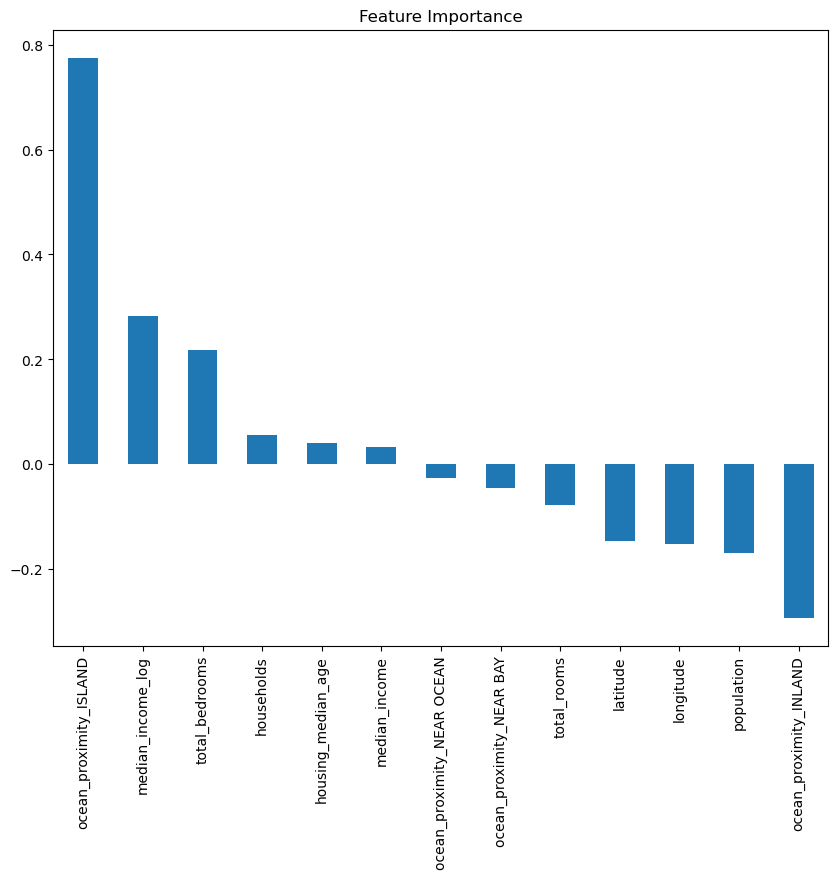

In [31]:
#plot feature importance
plt.figure(figsize=(10,8))
feature_imp.plot(kind='bar')
plt.title('Feature Importance')
plt.show()

**Key Findings:**

- **Positive Impact:**
  - Features with positive coefficients contribute positively to the prediction of median house values.
  - Notable positive contributors include:
    - `ocean_proximity_ISLAND` with a coefficient of 0.7762.
    - `median_income_log` with a coefficient of 0.2826.
    - `total_bedrooms` with a coefficient of 0.2181.

- **Negative Impact:**
  - Features with negative coefficients contribute negatively to the prediction of median house values.
  - Notable negative contributors include:
    - `ocean_proximity_INLAND` with the most significant negative impact, having a coefficient of -0.2934.
    - `population` with a coefficient of -0.1694.
    - `longitude` and `latitude` with coefficients of -0.1529 and -0.1477, respectively.

- **Insights:**
  - Proximity to an island (ocean_proximity_ISLAND) has the most significant positive impact, suggesting that houses in close proximity to islands tend to have higher values.
  - Higher median income (median_income_log) and the total number of bedrooms (total_bedrooms) positively influence house values.
  - Inland locations (ocean_proximity_INLAND) have a notable negative impact on house values.

## [Residuals Analysis and Model Fit Assessment](#residuals_analysis)

In [28]:
#inverse transfrom prediction and actual values for evaluation
y_pred_original = np.expm1(y_pred)
y_test_original = np.expm1(y_test)
residuals = y_test_original - y_pred_original

#create a DataFrame to compare actual vs predicted values
comparision_df = pd.DataFrame({'Actual': y_test_original,
                              'Predicted': y_pred_original,
                              'Residuals': residuals})

#display the comparision
print(comparision_df.head(10))

         Actual      Predicted      Residuals
14416  245800.0  185226.217291   60573.782709
16383  137900.0  137561.635993     338.364007
7731   218200.0  194913.494072   23286.505928
1410   220800.0  164170.948003   56629.051997
1335   170500.0  168186.933778    2313.066222
16260   75000.0   90147.243254  -15147.243254
18011  269400.0  287377.720324  -17977.720324
10086  228900.0  244652.746521  -15752.746521
18294  500001.0  392532.661950  107468.338050
18733   80800.0   76365.704311    4434.295689


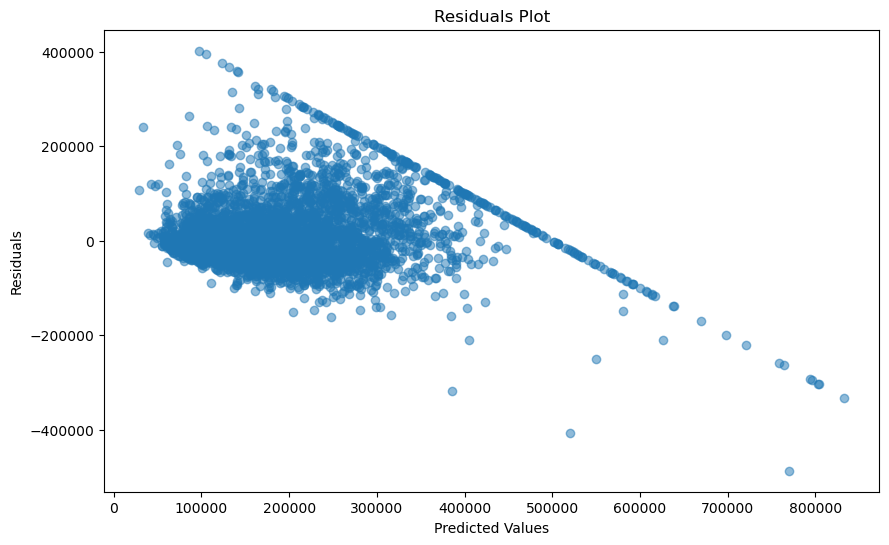

In [34]:
# Visualize residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_original, residuals, alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

**Key Insights from Residuals Plot:**

- **Random Distribution:**
  - The residuals (actual vs predicted differences) exhibit a random distribution around 0, indicating an unbiased and independent model.

- **Constant Variance (Homoscedasticity):**
  - The spread of residuals remains relatively constant across the range of predicted values, suggesting homoscedasticity.

- **Presence of Outliers:**
  - Notably, there are some large positive and negative residuals (outliers) indicating the model's struggle with extreme values.

- **Even Distribution of Outliers:**
  - The outliers appear evenly distributed, with no systematic skew, suggesting no specific bias in the model's errors.

- **Decent Model Fit:**
  - Overall, the residuals exhibit a random and constant spread, indicating a reasonable fit for the majority of the data.

- **Room for Improvement:**
  - The presence of some large outliers suggests opportunities for model enhancement, especially in handling extreme values more effectively.

## [Recommendations for Further Analysis](#recommendation)

- **Explore Large Residuals:**
  - Investigate data points with large errors to gain insights into patterns or characteristics that the model struggles to capture.

- **Consider Robust Regression:**
  - Explore techniques like robust regression to improve the model's resilience to outliers.

- **Fine-Tune Model Parameters:**
  - Experiment with hyperparameter tuning or different regression models to potentially improve overall model performance.

**Conclusion:**

The residuals analysis provides valuable insights into the strengths and weaknesses of the linear regression model. While the model demonstrates reasonable performance for the majority of data points, addressing outliers and exploring alternative modeling approaches could further enhance its predictive capabilities.
